## Env setup

* virtualenv jupyterenv
* source jupyterenv/bin/activate
* pip install jupyter
* pip3 install pandas
* pip3 install matplotlib
* pip3 install sklearn pydotplus
* jupyter notebook

Details from [w3schools on decision trees in Python](https://www.w3schools.com/python/python_ml_decision_tree.asp)

In [29]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [30]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df) 

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [31]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y) 

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


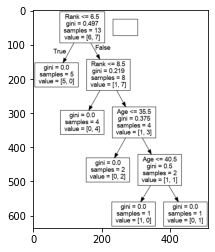

In [32]:
train_set = X.to_numpy()

dtree = DecisionTreeClassifier()
dtree = dtree.fit(train_set, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show() 

In [33]:
print(dtree.predict([[40, 10, 7, 1]])) 

[1]


In [34]:
print(dtree.predict([[40, 10, 6, 1]])) 

[0]


In [35]:
print(dtree.predict([[40, 10, 6, 0]])) 

[0]
